# KMean Clustering 
For this task we will first do some EDA, and check the data for missing values and see whether we can impute them. 
We will also check the correlation matrix for feature selection

Then we will do the following 2 tasks


1.   Apply KMeans clustering by manually assigning the cluster size
2.   Apply KMeans clustering using Elbow method to decide on the clusters

## About the Dataset
The Dataset is readily available in this [link](https://archive.ics.uci.edu/ml/datasets/Facebook+Live+Sellers+in+Thailand#) .
This contains data about posts type made by a user in a particular time of day, along with the reactions, likes, shares counts.







In [62]:
#importing the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [44]:
#reading the file
df = pd.read_csv("/content/sample_data/Live_20210128.csv")
print(df.shape)
df.head()

(7050, 12)


,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,1,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0
1,2,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0
2,3,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0
3,4,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0
4,5,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0


In [45]:
#checking for missing values
df.isnull().sum()

status_id           0
status_type         0
status_published    0
num_reactions       0
num_comments        0
num_shares          0
num_likes           0
num_loves           0
num_wows            0
num_hahas           0
num_sads            0
num_angrys          0
dtype: int64

There seems to be no missing values in this data. We will now try to see the correlation matrix

In [67]:
#checking for the status type counts
df['status_type'].value_counts()

photo     4288
video     2334
status     365
link        63
Name: status_type, dtype: int64

The above summary shows that the clusters are imbalanced

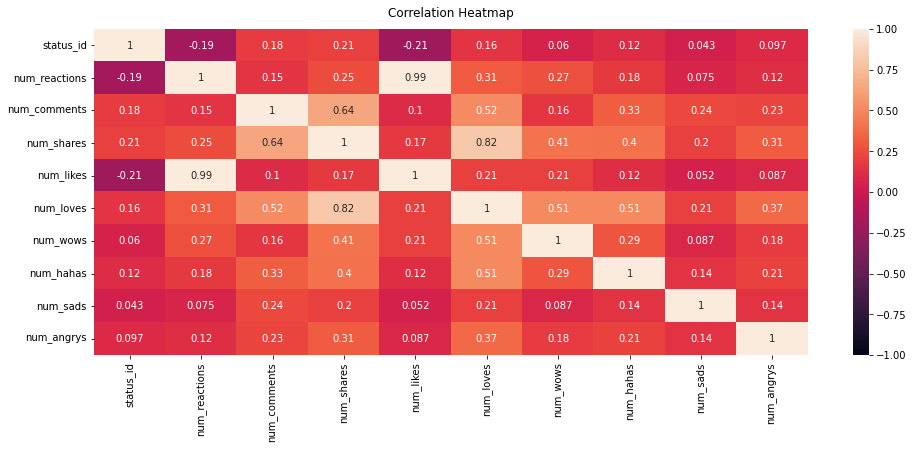

In [46]:
#checking for correlation matrix
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

There seems to be high correlation between "num_reactions" and "num_likes" thefore we will drop "num_reactions" from the dataframe. Although there are few more high correlations, they fields have different meanings, so we will keep the rest.

In [47]:
#we will now drop the num_reactions and status_id column and then create dummy variable for status type
df.drop(['status_id' ,'num_reactions'],axis=1,inplace=True)

scaler = StandardScaler()
df_temp = df.drop(['status_type' ,'status_published'],axis=1)
df_scaled = pd.DataFrame(scaler.fit_transform(df_temp), columns=df_temp.columns)
df_scaled

,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,0.323350,1.686879,0.482727,1.983266,0.196196,0.076713,0.473570,-0.155748
1,-0.252206,-0.304144,-0.144720,-0.318454,-0.147879,-0.176010,-0.152587,-0.155748
2,0.013089,0.129017,-0.024571,0.206938,-0.033187,0.076713,-0.152587,-0.155748
3,-0.252206,-0.304144,-0.231495,-0.318454,-0.147879,-0.176010,-0.152587,-0.155748
4,-0.252206,-0.304144,-0.024571,-0.093286,-0.147879,-0.176010,-0.152587,-0.155748
...,...,...,...,...,...,...,...,...
7045,-0.252206,-0.304144,-0.280445,-0.318454,-0.147879,-0.176010,-0.152587,-0.155748
7046,-0.252206,-0.304144,-0.447319,-0.293436,-0.147879,0.076713,-0.152587,-0.155748
7047,-0.252206,-0.304144,-0.476244,-0.293436,-0.147879,-0.176010,-0.152587,-0.155748
7048,-0.238717,-0.136959,0.298053,-0.268417,-0.147879,-0.176010,-0.152587,-0.155748


In [48]:
#concatenating the status_type with the scaled dataframe
df_final = pd.concat([df['status_type'], df_scaled], axis=1)
print(df_final.shape)
df_final.head()

(7050, 9)


,status_type,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,0.323350,1.686879,0.482727,1.983266,0.196196,0.076713,0.473570,-0.155748
1,photo,-0.252206,-0.304144,-0.144720,-0.318454,-0.147879,-0.176010,-0.152587,-0.155748
2,video,0.013089,0.129017,-0.024571,0.206938,-0.033187,0.076713,-0.152587,-0.155748
3,photo,-0.252206,-0.304144,-0.231495,-0.318454,-0.147879,-0.176010,-0.152587,-0.155748
4,photo,-0.252206,-0.304144,-0.024571,-0.093286,-0.147879,-0.176010,-0.152587,-0.155748


In [49]:
#making dummy variable for status type
dummy = pd.get_dummies(df_final['status_type'], dtype=float)
df_final = pd.concat([dummy, df_final], axis=1)
df_final.drop(['status_type'],axis=1,inplace=True)
df_final.head()

,link,photo,status,video,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,0.0,0.0,0.0,1.0,0.323350,1.686879,0.482727,1.983266,0.196196,0.076713,0.473570,-0.155748
1,0.0,1.0,0.0,0.0,-0.252206,-0.304144,-0.144720,-0.318454,-0.147879,-0.176010,-0.152587,-0.155748
2,0.0,0.0,0.0,1.0,0.013089,0.129017,-0.024571,0.206938,-0.033187,0.076713,-0.152587,-0.155748
3,0.0,1.0,0.0,0.0,-0.252206,-0.304144,-0.231495,-0.318454,-0.147879,-0.176010,-0.152587,-0.155748
4,0.0,1.0,0.0,0.0,-0.252206,-0.304144,-0.024571,-0.093286,-0.147879,-0.176010,-0.152587,-0.155748


# Task 1
Implementing KMeans clustering using manual cluster size

In [56]:
km = KMeans(n_clusters=4).fit(df_final)
df["Cluster Name"] = km.labels_

In [58]:
df[df['Cluster Name']==0]

,status_type,status_published,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Cluster Name
1,photo,4/21/2018 22:45,0,0,150,0,0,0,0,0,0
2,video,4/21/2018 6:17,236,57,204,21,1,1,0,0,0
3,photo,4/21/2018 2:29,0,0,111,0,0,0,0,0,0
4,photo,4/18/2018 3:22,0,0,204,9,0,0,0,0,0
5,photo,4/18/2018 2:14,6,0,211,5,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
7045,photo,9/24/2016 2:58,0,0,89,0,0,0,0,0,0
7046,photo,9/23/2016 11:19,0,0,14,1,0,1,0,0,0
7047,photo,9/21/2016 23:03,0,0,1,1,0,0,0,0,0
7048,photo,9/20/2016 0:43,12,22,349,2,0,0,0,0,0


In [60]:
#now we groupby and see what interesting features have comeout
df_grouped = df.groupby(by=['Cluster Name','status_type']).size().reset_index(name='counts')
df_grouped

,Cluster Name,status_type,counts
0,0,link,49
1,0,photo,4041
2,0,status,285
3,0,video,1797
4,1,photo,1
5,1,video,33
6,2,link,14
7,2,photo,222
8,2,status,80
9,2,video,77


# Task 2
Applying KMeans clustering using Elbow method to decide the cluster count


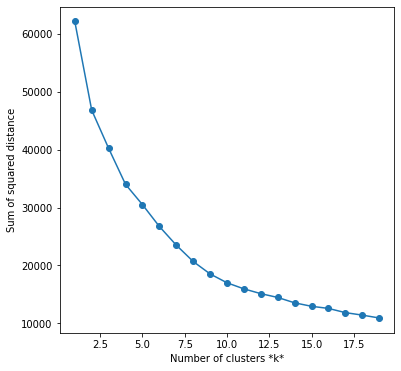

In [66]:
# Run the Kmeans algorithm and get the index of data points clusters
sse = []
list_k = list(range(1, 20))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(df_final)
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance');

The Elbow curve seems to keep on decreasing, which indicates that no proper k is available. But for the purpose of the task we care choosing k=8

In [68]:
km = KMeans(n_clusters=8).fit(df_final)
df["Cluster Name"] = km.labels_

In [69]:
#now we groupby and see what interesting features have comeout
df_grouped = df.groupby(by=['Cluster Name','status_type']).size().reset_index(name='counts')
df_grouped

,Cluster Name,status_type,counts
0,0,photo,2
1,0,video,136
2,1,link,49
3,1,photo,4034
4,1,status,285
5,1,video,1362
6,2,photo,9
7,2,video,728
8,3,video,23
9,4,link,14


# Conclusion
Clearly there is room for improvements. One suggestion would be to use dimensionalty reduction methods like PCA to reduce the feature dimensions before applying KMeans clustering, as the curse of dimensionalty has a larger role to play in this